# Patients victimes d'un accident vasculaire cérébral (AVC)

**Ensemble de données Analytics Vidhya for Mckinsey sur les soins de santé**

**Objectif**

**Prédire si un patient aura un accident vasculaire cérébral ou non en fonction de certains attributs donnés**

## Exploration des données

**Importer les bibliothèques**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importer le jeu de données**

In [2]:
data_avc = pd.read_csv('healthcare-dataset-stroke-data.csv',sep=';')

In [3]:
data_avc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Description des features**

1. **id** : Identifiant du patient
2. **gender** : Genre du partient
3. **age** : Age du patient
4. **hypertension** : 0 - Pas d'hypertension; 1 - Souffrant d'hypertension
5. **heart_disease** : 0 - Pas de maladie cardiaque; 1 - Souffrant d'une maladie cardiaque
6. **ever_married** : Jamais marié (Oui - Non)
7. **work_type** : Type de travail
8. **residence_type** : Type de zone de résidence (Urbaine / Rurale)
9. **avg_glucose_level** : Niveau moyen de glucose (mesuré après le repas)
10. **bmi** : Indice de masse corporelle
11. **smoking_status** : Statut tabagique du patient
12. **stroke** : 0 - Aucun accident vasculaire cérébral; 1 - Accident vasculaire cérébral subi

In [4]:
data_avc.shape

(5110, 12)

In [5]:
features_names = list(data_avc.columns)

In [6]:
features_names

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

**Supprimer la colonne 'id'**

In [7]:
data_avc = data_avc.drop(['id'], axis=1)

In [8]:
data_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Informations**

In [9]:
data_avc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Vérifier les valeurs manquantes**

In [10]:
data_avc.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
round(data_avc.isnull().sum()/len(data_avc)*100,2)

gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

<AxesSubplot:>

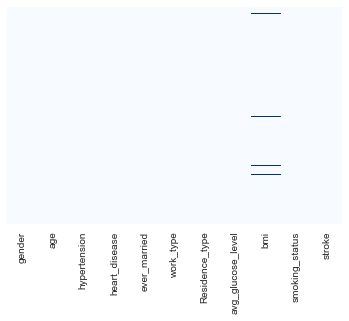

In [12]:
sns.heatmap(data_avc.isnull(), yticklabels = False, cbar = False, cmap='Blues')

**Remplacer les valeurs manquantes**

In [13]:
print(data_avc['bmi'].mean())
print(data_avc['bmi'].median())

28.893236911794673
28.1


In [14]:
data_avc['bmi']=data_avc['bmi'].fillna(data_avc['bmi'].mean())

In [15]:
data_avc.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
data_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


**Description statistique**

In [17]:
data_avc.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
data_avc.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [19]:
data_avc['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [20]:
data_avc['stroke'].value_counts(normalize = 'True')

0    0.951272
1    0.048728
Name: stroke, dtype: float64

**Boxplot**

In [21]:
sns.set(style = 'whitegrid')
num_features = ['age', 'avg_glucose_level', 'bmi']

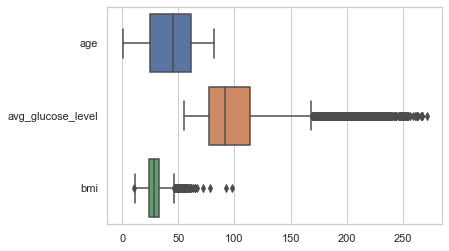

In [22]:
ax = sns.boxplot(data = data_avc[num_features],orient='h')

**Histogramme**

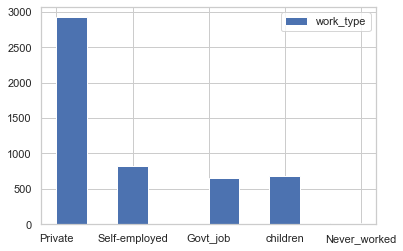

In [23]:
plt.hist(data_avc['work_type'], label='work_type')
plt.legend()

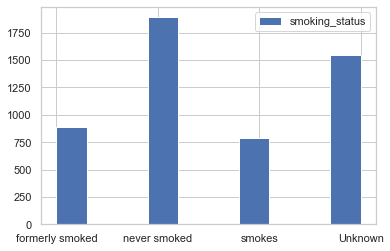

In [24]:
plt.hist(data_avc['smoking_status'], label='smoking_status')
plt.legend()

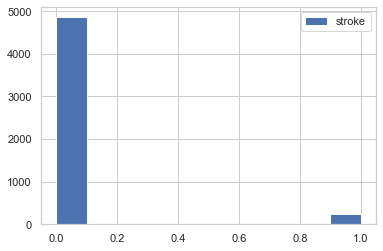

In [25]:
plt.hist(data_avc['stroke'], label='stroke')
plt.legend()

**Visualisation des variables numériques deux à deux**

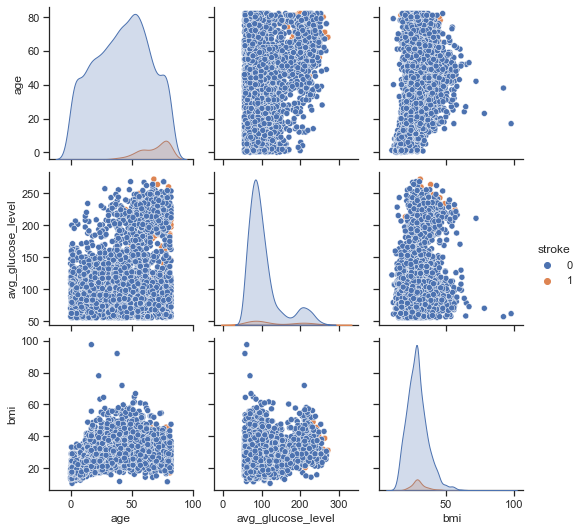

In [26]:
sns.set(style = 'ticks')
sns.pairplot(data_avc[['age','avg_glucose_level','bmi','stroke']], hue = 'stroke')

**Corrélations**

In [27]:
correlations = data_avc.corr(method = 'pearson')

<AxesSubplot:>

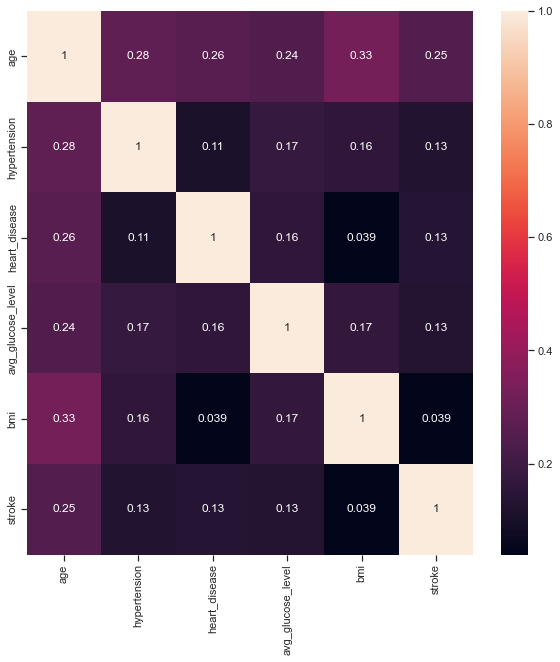

In [28]:
f , ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot = True)

**Moyenne des victimes d'avc pour chaque feature**

In [29]:
features_mean = ['age', 'hypertension','heart_disease','avg_glucose_level', 'bmi', 'stroke']

In [30]:
mean_data_avc = pd.DataFrame({'Stroke': data_avc[data_avc['stroke'] == 1].mean(),\
                          'No Stroke': data_avc[data_avc['stroke'] == 0].mean(),\
                          'All': data_avc.mean()},
                      index = features_mean)

In [31]:
mean_data_avc

,Stroke,No Stroke,All
age,67.728193,41.971545,43.226614
hypertension,0.265060,0.088871,0.097456
heart_disease,0.188755,0.047110,0.054012
avg_glucose_level,132.544739,104.795513,106.147677
bmi,30.217789,28.825388,28.893237
stroke,1.000000,0.000000,0.048728


## Préparation des données

**Replacer 'Female' & 'Male' de la variable 'gender' avec 0 & 1**

In [32]:
d = {'Female' : 0, 'Male' : 1, 'Other' : 2}
data_avc['gender'] = data_avc['gender'].map(d)

In [33]:
data_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


**On peut aussi utiliser la méthode 'replace'**

**Remplacer 'yes' & 'no' de 'ever_married' avec 1 & 0**

In [34]:
d = {'Yes' : 1, 'No' : 0}
data_avc = data_avc.replace({'ever_married' : d})

In [35]:
data_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


**On peut aussi utiliser LabelEncoder du module preprocessing**

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [37]:
data_avc['work_type']= label.fit_transform(data_avc['work_type'])
data_avc['Residence_type']= label.fit_transform(data_avc['Residence_type'])
data_avc['smoking_status']= label.fit_transform(data_avc['smoking_status'])

In [38]:
data_avc.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


**Features et varibale cible**

In [39]:
data_avc.shape

(5110, 11)

In [40]:
data_avc.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [41]:
X = data_avc.iloc[:,0:10]
y = data_avc['stroke']

In [42]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [43]:
X.shape

(5110, 10)

In [44]:
X = X.values
y = y.values

**On peut voir qu'on a un ensemble de données déséquilibré, si on continue avec cela, il y a une forte possibilité que l'algorithme ML ne prédit aucun accident vasculaire cérébral pour toutes les données. On doit rendre les données plus équilibrées**

**On utilise la méthode ROSE pour gérer cela et rendre les données plus équilibrées, ce qui génère des données artificielles pour rendre l'ensemble plus équilibré**

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
ros = RandomOverSampler(random_state=0)

In [48]:
X_augmente, y_augmente = ros.fit_resample(X, y)

In [49]:
print('Dimension X_augmente', X_augmente.shape)
print('Dimension y_augmente', y_augmente.shape)

Dimension X_augmente (9722, 10)
Dimension y_augmente (9722,)


In [50]:
y_augmente.mean()

0.5

**Jeu d'entraînement et jeu de test**

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_augmente,y_augmente,test_size = 0.2,random_state = 0)

In [52]:
print('Dimension de X_train', X_train.shape)
print('Dimension de X_test', X_test.shape)
print('Dimension de y_train', y_train.shape)
print('Dimension de y_test', y_test.shape)

Dimension de X_train (7777, 10)
Dimension de X_test (1945, 10)
Dimension de y_train (7777,)
Dimension de y_test (1945,)


In [53]:
print(y_train.mean())
print(y_test.mean())

0.5000642921435
0.4997429305912596


**Mise en échelle**

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [56]:
X_train[0,:]

array([  1.  ,  80.  ,   0.  ,   1.  ,   1.  ,   3.  ,   1.  , 252.72,
        30.5 ,   1.  ])

In [57]:
X_train_sc[0,:]

array([ 1.15439772,  1.12676595, -0.4652814 ,  2.67432078,  0.54798196,
        0.91077453,  0.94970101,  2.43199112,  0.14664559, -0.43232988])

## Modélisation

In [58]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-02-09 21:28:21.980521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:28:21.987393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-02-09 21:28:21.987417: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-02-09 21:28:21.988426: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(X_train_sc, y_train, epochs=100, batch_size=128)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5465
Epoch 2/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.6746
Epoch 3/100
61/61 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.7466
Epoch 4/100
61/61 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7728
Epoch 5/100
61/61 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7810
Epoch 6/100
61/61 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7837
Epoch 7/100
61/61 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7833
Epoch 8/100
61/61 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7841
Epoch 9/100
61/61 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7871
Epoch 10/100
61/61 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7886
Epoch 11/

In [63]:
y_pred = model.predict(X_test_sc)

In [64]:
y_pred = y_pred>0.5

In [65]:
y_pred[0:5]

array([[False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[721, 252],
       [118, 854]])

In [67]:
accuracy_score(y_test,y_pred)

0.8097686375321337

In [68]:
history = model.fit(X_train_sc, y_train,validation_data = (X_test_sc,y_test), epochs=100, batch_size=64)

Epoch 1/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8269 - val_loss: 0.3983 - val_accuracy: 0.8098
Epoch 2/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8250 - val_loss: 0.3987 - val_accuracy: 0.8149
Epoch 3/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8263 - val_loss: 0.3976 - val_accuracy: 0.8144
Epoch 4/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8289 - val_loss: 0.3966 - val_accuracy: 0.8108
Epoch 5/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8280 - val_loss: 0.3970 - val_accuracy: 0.8098
Epoch 6/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8289 - val_loss: 0.3980 - val_accuracy: 0.8113
Epoch 7/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8290 - val_loss: 0.3958 - val_accuracy: 0.8154

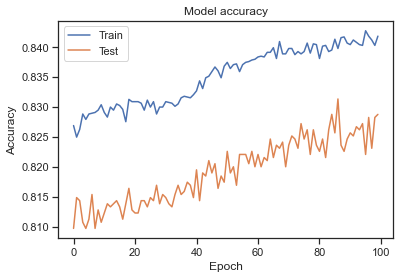

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

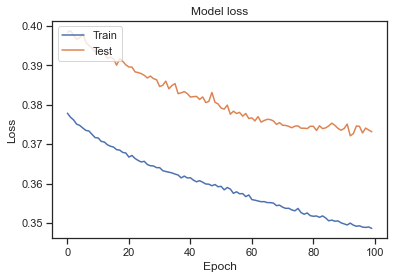

In [70]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')